Import, inspect and transform data

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mglearn

In [2]:
data = pd.read_csv("Data/digit-recognizer/train.csv")

In [3]:
y = data["label"]
y = y.values
y

array([1, 0, 1, ..., 7, 6, 9], dtype=int64)

In [4]:
X = data.drop(columns={"label"})
X = X.values
X.shape
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

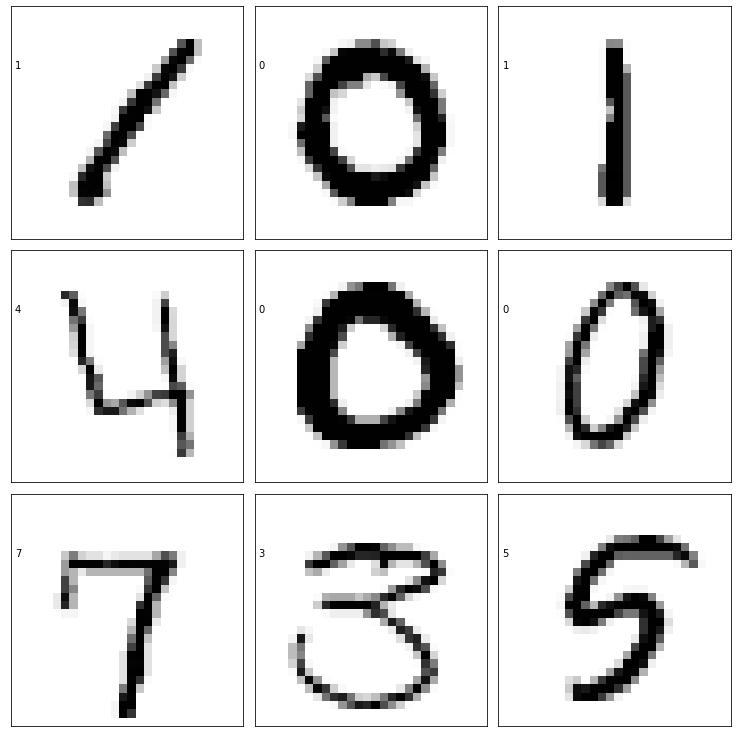

In [5]:
X_image = X[:100].reshape(100,28,28)
# set up the figure
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 28x28 pixels
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(X_image[i], cmap=plt.cm.Greys, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(y[i]))

In [6]:
from sklearn import preprocessing
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)

In [7]:
X_image = X[:100].reshape(100,28,28)

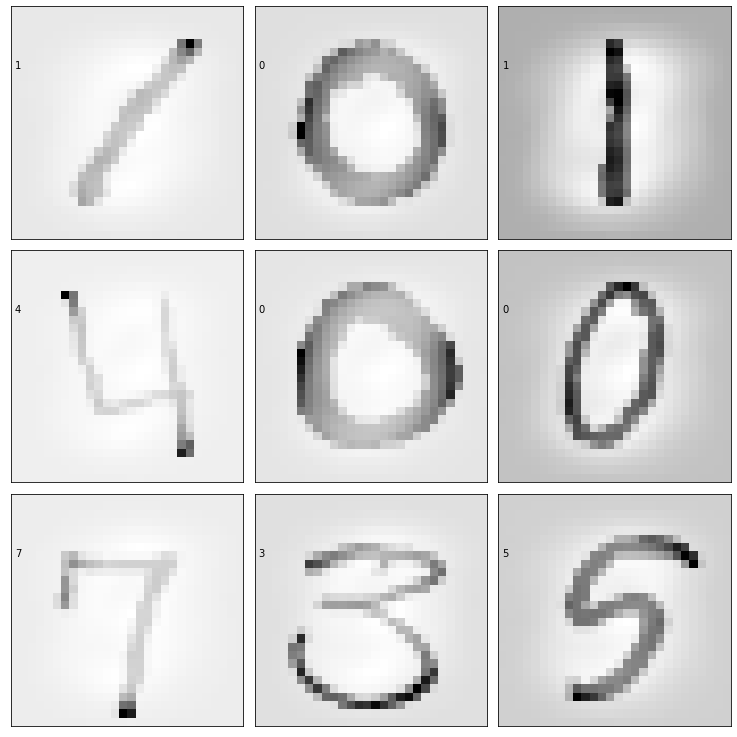

In [8]:
# set up the figure
fig = plt.figure(figsize=(10, 10))  # figure size in inches
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 28x28 pixels
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1, xticks=[], yticks=[])
    ax.imshow(X_image[i], cmap=plt.cm.Greys, interpolation='nearest')
    
    # label the image with the target value
    ax.text(0, 7, str(y[i]))

Split data into test and train

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=42,
                                                    stratify=y)

# Logistic Regression

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
classifier = LogisticRegression(max_iter=10000, random_state = 42)

In [12]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [13]:
prediction = classifier.predict(X_test)

In [14]:
accuracy = np.mean(prediction == y_test)
print("Overall prediction accuracy: {:.2f}".format(accuracy))

Overall prediction accuracy: 0.90


In [15]:
classifier.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 10000,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 42,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

# Naive-Bayes

In [31]:
from sklearn.naive_bayes import BernoulliNB

bnb_classifier = BernoulliNB()

bnb_classifier.fit(X_train, y_train)

prediction = bnb_classifier.predict(X_test)

accuracy = np.mean(prediction == y_test)
print("Overall prediction accuracy: {:.2f}".format(accuracy))

Overall prediction accuracy: 0.83


In [32]:
bnb_classifier.get_params()

{'alpha': 1.0, 'binarize': 0.0, 'class_prior': None, 'fit_prior': True}

# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

rf_classifier = RandomForestClassifier(random_state = 42)

rf_classifier.fit(X_train, y_train)

prediction = rf_classifier.predict(X_test)

accuracy = np.mean(prediction == y_test)
print("Overall prediction accuracy: {:.2f}".format(accuracy))

Overall prediction accuracy: 0.96


In [34]:
rf_classifier.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

# SVM

In [35]:
from sklearn import svm

svm_classifier = svm.SVC(random_state=42)

svm_classifier.fit(X_train, y_train)

prediction = svm_classifier.predict(X_test)

accuracy = np.mean(prediction == y_test)
print("Overall prediction accuracy: {:.2f}".format(accuracy))

Overall prediction accuracy: 0.96


In [36]:
svm_classifier.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': 42,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

# Neural Network

In [37]:
from sklearn.neural_network import MLPClassifier

mlp_classifier = MLPClassifier(random_state = 42)

mlp_classifier.fit(X_train, y_train)

prediction = mlp_classifier.predict(X_test)

accuracy = np.mean(prediction == y_test)
print("Overall prediction accuracy: {:.2f}".format(accuracy))

Overall prediction accuracy: 0.97


In [38]:
mlp_classifier.get_params()

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 42,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}